<b>BALANCEAMENTO  :</b> Undersampling

<b>CODIFICACAO:</b> One-Hot Encoding

<b>VALIDAÇÃO:</b> Hold-out (80:20)

<b>ALGORITMO:</b> Arvore de Decisao - CART

<B>CRITÉRIO:</B> Entropia

---

## Bibliotecas

In [24]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score

In [25]:
df = pd.read_csv("../Database/3.Dados_Transformados/Round2_dados_UnderSampling_OneHot.csv")

---

## Modelo de Classificação

In [29]:
X = df.values[:,:33] # Atributos
y = df.values[:,33]  # Rotulo

- Tamanho do conjunto de teste: 20% do Total

In [30]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 123)

<b>Criterio:</b> Entropia

In [31]:
classifier = DecisionTreeClassifier(criterion = "entropy", 
                                    random_state = 123)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
print("Acurácia : ", metrics.accuracy_score(y_test, y_pred))
print("Recall   : ", metrics.recall_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1 Score : ", metrics.f1_score(y_test, y_pred))

Acurácia :  0.7311827956989247
Recall   :  0.7448979591836735
Precision:  0.7448979591836735
F1 Score :  0.7448979591836735


---

## Curva ROC 

In [34]:
# Predict class probabilities
predict_proba = classifier.predict_proba(X_test)

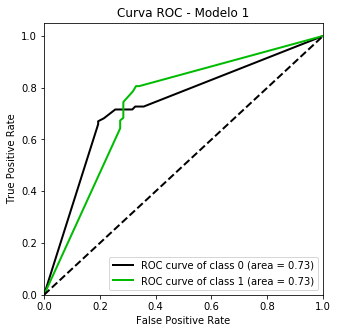

In [39]:
skplt.metrics.plot_roc(y_test, 
                       predict_proba, 
                       figsize=(5,5), 
                       title='Curva ROC - Modelo 1',
                       plot_micro=False, 
                       plot_macro=False)

plt.savefig("../5. Interpretacao/M1_CurvaROC.png", dpi=1000, transparent=True)

---

## Matriz de Confusão

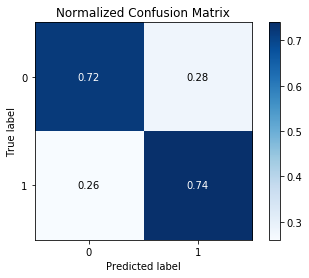

In [38]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.savefig("../5. Interpretacao/M1_MatrizConfusao.png", dpi=1000, transparent=True)

----

## Gráfico da Árvore

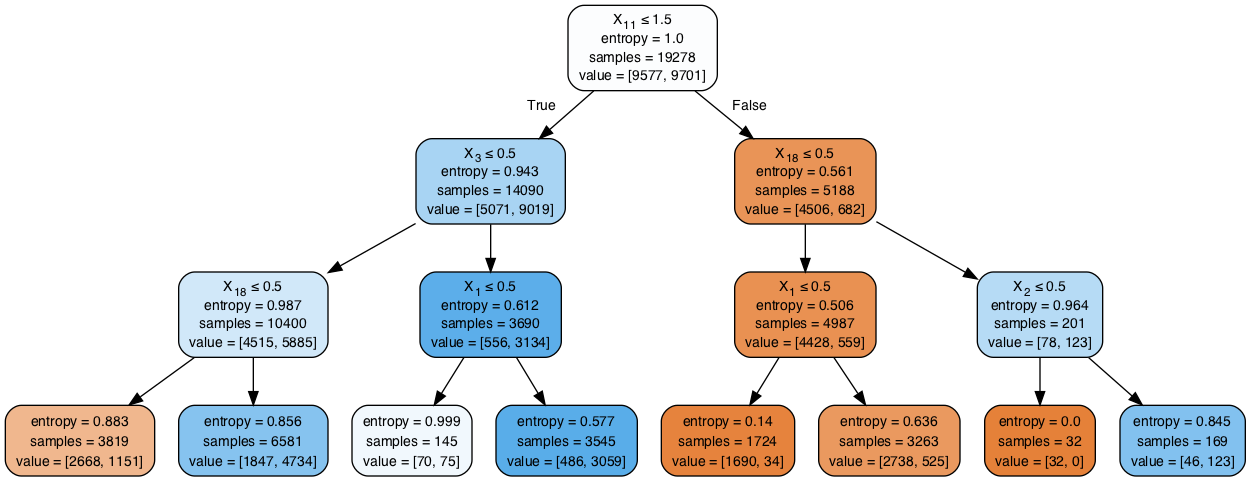

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [42]:
from sklearn import tree
dotfile = open("dt.dot", 'w')
tree.export_graphviz(classifier, out_file=dotfile, feature_names=list(df.iloc[:,0:30]), class_names=['NORMAL', 'GRAVE'], filled=True, proportion=False, rounded=True)
dotfile.close()

---

### Salvando modelo

In [115]:
import pickle
filename = "Modelos/M3_Undersampling_OneHot_Arvore.sav"
pickle.dump(classifier, open(filename, 'wb'))

---